In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import numpy as np
from tensorflow.keras.utils import to_categorical

In [2]:
from load_data_MLHC import load_test_data

## Run only for the first time
X_test, y_test = load_test_data()
TRUE = y_test

------------------------------
Creating test images...
------------------------------
COVID-19 0
Done: 0/210 images
Done: 100/210 images
Done: 200/210 images
Non-COVID 1
Done: 0/210 images
Done: 100/210 images
Done: 200/210 images
Normal 2
Done: 0/210 images
Done: 100/210 images
Done: 200/210 images
210
Loading done.


In [3]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from tensorflow.keras.models import load_model

In [4]:
Model_healthy = load_model('../Layer-I/model_layer1/CNN')
y_pred_healthy = Model_healthy.predict(X_test)
y_true_healthy = y_test

In [5]:
# For NN
y_pred_healthy_NN = np.argmax(y_pred_healthy,axis=1)
position = []
y_pred_multiclass = []

for i in range(len(y_pred_healthy_NN)):
    if y_pred_healthy_NN[i] == 1:
        y_pred_multiclass.append(2)
        position.append(i)

In [6]:
# # For ML
# position = []
# y_pred_multiclass = []

# for i in range(len(y_pred_healthy)):
#     if y_pred_healthy[i] == 1:
#         y_pred_multiclass.append(2)
#         position.append(i)

In [7]:
X_test_multiclass = []
y_true_multiclass = []

In [8]:
X_test = X_test.tolist()
y_test = y_test.tolist()
for i in reversed(range(len(position))):
    
    pop_x = X_test.pop(position[i])
    pop_y = y_test.pop(position[i])
    X_test_multiclass.append(pop_x)
    y_true_multiclass.append(pop_y)

In [9]:
print(len(X_test_multiclass))
print(len(y_true_multiclass))
print(len(y_pred_multiclass))

203
203
203


In [10]:
print(len(X_test))
print(len(y_test))

427
427


In [11]:
# For ML
# Model_COVID = joblib.load('../Layer-II/model_layer2/Layer2_SVM.model')
# y_pred_COVID = Model_COVID.predict(X_test)
# y_true_COVID = y_test

In [12]:
# For NN
Model_COVID = load_model('../Layer-II/model_layer2/CNN')
y_pred_COVID = Model_COVID.predict(X_test)
y_true_COVID = y_test

In [13]:
# For NN
y_pred_COVID = np.argmax(y_pred_COVID,axis=1)
y_pred_COVID = y_pred_COVID.tolist()

In [14]:
# For ML
# y_pred_COVID = y_pred_COVID.tolist()

In [15]:
y_true = y_true_multiclass+y_true_COVID
y_pred = y_pred_multiclass+y_pred_COVID
y_TRUE = np.argmax(y_true,axis=1)

print(classification_report(y_TRUE, y_pred , target_names=["COVID-19","Non-COVID-19","Healthy"], digits = 5))
cnf_matrix = confusion_matrix(y_TRUE, y_pred)
print('=' * 100)
print(cnf_matrix)
print('=' * 100)

              precision    recall  f1-score   support

    COVID-19    0.99048   0.99048   0.99048       210
Non-COVID-19    0.94931   0.98095   0.96487       210
     Healthy    0.98030   0.94762   0.96368       210

    accuracy                        0.97302       630
   macro avg    0.97336   0.97302   0.97301       630
weighted avg    0.97336   0.97302   0.97301       630

[[208   1   1]
 [  1 206   3]
 [  1  10 199]]


In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[208   1   1]
 [  1 206   3]
 [  1  10 199]]


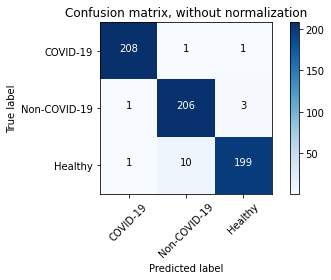

In [18]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["COVID-19","Non-COVID-19","Healthy"],
                      title='Confusion matrix, without normalization')

<function matplotlib.pyplot.show(close=None, block=None)>

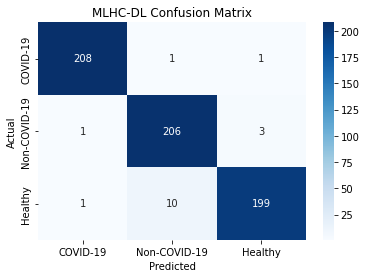

In [19]:
import seaborn as sns
plt.figure()
ax = plt.subplot()

ax.set_title('MLHC-DL Confusion Matrix')
cm = metrics.confusion_matrix(y_TRUE,y_pred)
classes=['COVID-19', 'Non-COVID-19', 'Healthy']
sns.heatmap(cm, annot=True,xticklabels=classes, yticklabels=classes,cmap='Blues',fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show

C:\Users\Tan\AppData\Local\Temp\ipykernel_9672\2515340757.py:19: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--',linestyle='--')


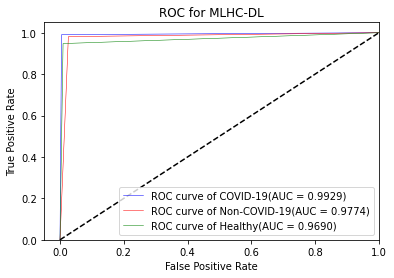

In [20]:
from sklearn.metrics import roc_curve, auc
#f = plt.subplots(figsize=(5, 5))
PRED = to_categorical(y_pred)
TRUE = np.array(y_true)
num_classes = 3

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
       fpr[i], tpr[i], _ = roc_curve(TRUE[:,i], PRED[:,i])
       roc_auc[i] = auc(fpr[i], tpr[i])
       colors = ['blue', 'red', 'green']
cls = {0:'COVID-19', 1:'Non-COVID-19', 2:'Healthy'}
for i, color ,c in zip(range(num_classes), colors, cls.values()):
    plt.plot(fpr[i], tpr[i], color=color, lw=0.5,
             label='ROC curve of '+c+ '(AUC = {1:0.4f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--',linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for MLHC-DL')
plt.legend(loc="lower right")
plt.show()